# Shallow Neural Network in Tensorflow
Build a shallow neural network to classify handwritten digits


## Load correct version of TensorFlow

In [0]:
# Install TensorFlow using Colab's tensorflow_version command
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load Dependencies here

In [0]:
import tensorflow 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt


# Load Data

In [0]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [0]:
 X_train.shape

(60000, 28, 28)

In [0]:
y_train.shape

(60000,)

In [0]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

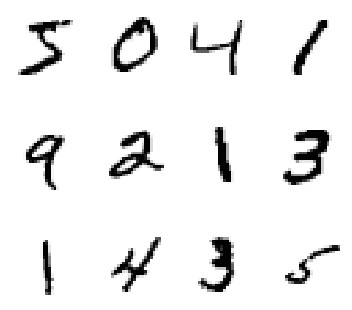

In [0]:
 plt.figure(figsize=(5,5))
 for k in range(12):
   plt.subplot(3, 4, k+1)
   plt.imshow(X_train[k], cmap='Greys')
   plt.axis('off')
plt.tight_layout()
plt.show()

In [0]:
X_valid.shape

(10000, 28, 28)

In [0]:
y_valid.shape

(10000,)

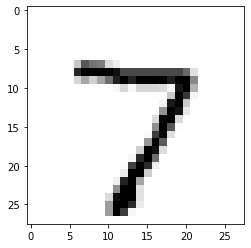

In [0]:
plt.imshow(X_valid[0],cmap='Greys')

In [0]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
y_valid[0]

7

# Preprocess data

In [0]:
X_train = X_train.reshape(60000,784).astype('float32')
X_valid = X_valid.reshape(10000,784).astype('float32')

In [0]:
X_train /= 255
X_valid /= 255

In [0]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [0]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Design NN arch

In [0]:
model = Sequential()
# hidden layer:
model.add(Dense(64, activation='relu', input_shape=(784,)))
#output layer:
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## Compile model

In [0]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

# Train model

In [0]:
model.fit(X_train,y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0918 - accuracy: 0.1006 - val_loss: 0.0910 - val_accuracy: 0.1208
Epoch 2/200
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0897 - accuracy: 0.1512 - val_loss: 0.0888 - val_accuracy: 0.1761
Epoch 3/200
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0875 - accuracy: 0.2147 - val_loss: 0.0865 - val_accuracy: 0.2498
Epoch 4/200
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0851 - accuracy: 0.2950 - val_loss: 0.0841 - val_accuracy: 0.3289
Epoch 5/200
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0826 - accuracy: 0.3628 - val_loss: 0.0816 - val_accuracy: 0.3860
Epoch 6/200
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0801 - accuracy: 0.4073 - val_loss: 0.0790 - val_accuracy: 0.4188
Epoch 7/200
60000/60000 [=========================

## Evaluating model performance

In [0]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.0126 - accuracy: 0.9211


[0.012629045263398439, 0.9211]

Performing inference

In [0]:
valid_0 = X_valid[0]. reshape(1, 784)
model.predict(valid_0)

array([[2.74497870e-04, 5.14300041e-07, 1.06241845e-04, 5.72449237e-04,
        2.88627180e-05, 2.23619616e-04, 1.39874601e-06, 9.97066200e-01,
        1.05148094e-04, 1.62110745e-03]], dtype=float32)

In [0]:
model.predict_classes(valid_0)

array([7])